In [1]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

In [2]:
read_df = pd.read_csv('data/transaction_data.csv')
df = read_df.copy()

print(df.head(10))
print(df.info())
print(df.shape)
print(df.size)

   UserId  TransactionId               TransactionTime  ItemCode  \
0  278166        6355745  Sat Feb 02 12:50:00 IST 2019    465549   
1  337701        6283376  Wed Dec 26 09:06:00 IST 2018    482370   
2  267099        6385599  Fri Feb 15 09:45:00 IST 2019    490728   
3  380478        6044973  Fri Jun 22 07:14:00 IST 2018    459186   
4      -1        6143225  Mon Sep 10 11:58:00 IST 2018   1733592   
5  285957        6307136  Fri Jan 11 09:50:00 IST 2019   1787247   
6  345954        6162981  Fri Sep 28 10:51:00 IST 2018    471576   
7      -1        6143225  Mon Sep 10 11:58:00 IST 2018    447867   
8  339822        6255403  Mon Dec 10 09:23:00 IST 2018   1783845   
9  328440        6387425  Sat Feb 16 10:35:00 IST 2019    494802   

                       ItemDescription  NumberOfItemsPurchased  CostPerItem  \
0     FAMILY ALBUM WHITE PICTURE FRAME                       6        11.73   
1                LONDON BUS COFFEE MUG                       3         3.52   
2    SET 12 CO

In [3]:
df.isna().sum()

UserId                       0
TransactionId                0
TransactionTime              0
ItemCode                     0
ItemDescription           2908
NumberOfItemsPurchased       0
CostPerItem                  0
Country                      0
dtype: int64

In [4]:
df = df[df.UserId > 0]
df = df[df.ItemCode > 0]
df = df[df.NumberOfItemsPurchased > 0]
df = df[df.CostPerItem > 0]
df = df[df.ItemDescription.notna()]
df = df[df.TransactionTime.str[-4:] != '2028']
# df = df[:500000]
# df.to_csv('./data/preprocesed_data.csv',index=False)
print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790726 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   UserId                  790726 non-null  int64  
 1   TransactionId           790726 non-null  int64  
 2   TransactionTime         790726 non-null  object 
 3   ItemCode                790726 non-null  int64  
 4   ItemDescription         790726 non-null  object 
 5   NumberOfItemsPurchased  790726 non-null  int64  
 6   CostPerItem             790726 non-null  float64
 7   Country                 790726 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 54.3+ MB
None
    UserId  TransactionId               TransactionTime  ItemCode  \
0   278166        6355745  Sat Feb 02 12:50:00 IST 2019    465549   
1   337701        6283376  Wed Dec 26 09:06:00 IST 2018    482370   
2   267099        6385599  Fri Feb 15 09:45:00 IST 2019    490728   
3   3

In [5]:
# Lets do some exploratory data analysis now. Lets see the no. of transactions being done in each part of the year.
df.TransactionTime = pd.to_datetime(df.TransactionTime)
df['month_year'] = pd.to_datetime(df.TransactionTime).dt.to_period('M')
df.sort_values(by=['month_year'], inplace=True)
Ser = df.groupby('month_year').TransactionId.nunique()
x = np.arange(0, len(Ser), 1)

d:\papku\університет\Дипломна\Проект\MarketBasketAnalysis\backend\venv\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


Text(0, 0.5, 'No. of transactions')

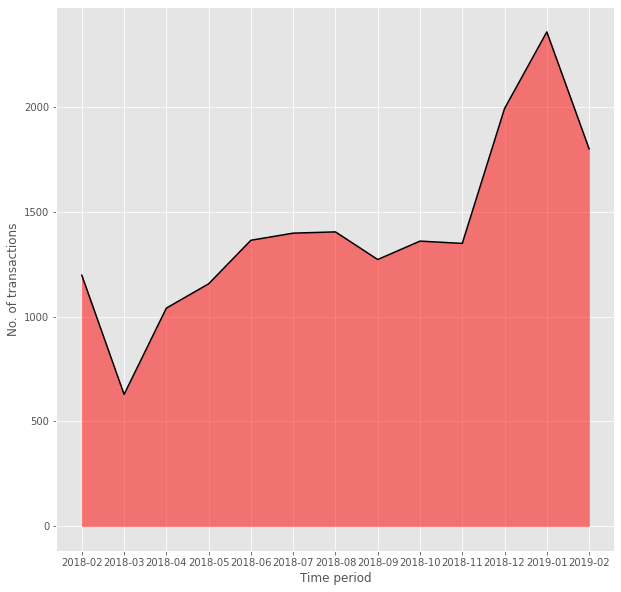

In [6]:
style.use('ggplot')
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)
ax1.plot(x, Ser, color='k')
ax1.fill_between(x, Ser, color='r', alpha=0.5)
ax1.set_xticks(x)
ax1.set_xticklabels(Ser.index)
plt.xlabel('Time period')
plt.ylabel('No. of transactions')
# plt.savefig('./images/graph1.png')

In [7]:
Ser = df.groupby('TransactionId').ItemDescription.nunique()
Ser.describe()

count    18334.000000
mean        21.014236
std         23.838977
min          1.000000
25%          7.000000
50%         15.000000
75%         27.000000
max        540.000000
Name: ItemDescription, dtype: float64

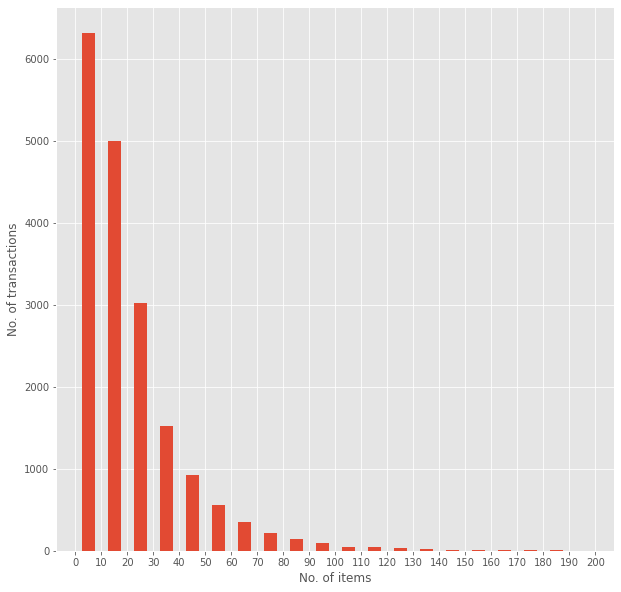

In [8]:
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(111)
ax1.hist(Ser, bins, histtype = 'bar', rwidth = 0.5)
ax1.set_xticks(bins)
plt.xlabel('No. of items')
plt.ylabel('No. of transactions')
plt.show()

<BarContainer object of 10 artists>

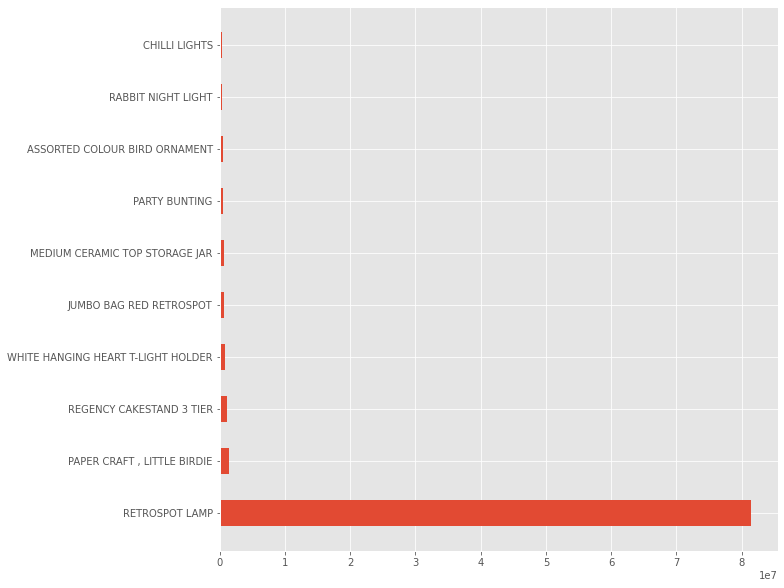

In [9]:
df['total_cost_item'] = df.NumberOfItemsPurchased*df.CostPerItem
Ser = df.groupby('ItemDescription').total_cost_item.sum()
Ser.sort_values(ascending = False, inplace = True)
Ser = Ser[:10]
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.barh(Ser.index, Ser, height = 0.5)

In [11]:
df = pd.read_csv('./data/preprocesed_data.csv')
df_set = df.groupby(['TransactionId', 'ItemDescription']).NumberOfItemsPurchased.sum().unstack().reset_index().fillna(0).set_index('TransactionId')
df_set.head()

ItemDescription,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
TransactionId,,,,,,,,,,,,,,,,,,,,,
5900015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5900026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5900037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5900048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5900059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
print(df_set.info())
print(df_set.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18334 entries, 5900015 to 6397457
Columns: 3871 entries,  4 PURPLE FLOCK DINNER CANDLES to ZINC WIRE SWEETHEART LETTER TRAY
dtypes: int64(3871)
memory usage: 541.6 MB
None
(18334, 3871)


In [12]:
# df_set = df_set.applymap(lambda x: 0 if x <= 0 else 1) # tooooooooooo slowwwwwwwwww
df_set = (df_set > 0).astype(np.int8)
# df_set.to_csv('./data/transactions.csv',index=False)
df_set

ItemDescription,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
TransactionId,,,,,,,,,,,,,,,,,,,,,
5900015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5900026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5900037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5900048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5900059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6397413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6397424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6397435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [2]:
# take only 10000 rows to be able to process data because of not enought memory
df_set = pd.read_csv('./data/transactions.csv')
frequent_itemsets = fpgrowth(df_set, min_support = 0.015, max_len=4, use_colnames = True)
# frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(lambda x: tuple(x))
# frequent_itemsets.to_csv('./data/frequent_itemsets.csv',index=False)
frequent_itemsets

,support,itemsets
0,0.106796,(WHITE HANGING HEART T-LIGHT HOLDER)
1,0.017181,(KNITTED UNION FLAG HOT WATER BOTTLE)
2,0.017127,(RED WOOLLY HOTTIE WHITE HEART.)
3,0.016145,(SET 7 BABUSHKA NESTING BOXES)
4,0.023563,(HAND WARMER UNION JACK)
...,...,...
447,0.017018,"(JUMBO BAG PEARS, JUMBO BAG APPLES)"
448,0.018817,"(JUMBO BAG VINTAGE LEAF, JUMBO BAG RED RETROSPOT)"
449,0.025254,"(GARDENERS KNEELING PAD CUP OF TEA , GARDENERS..."
450,0.015327,"(SMALL WHITE HEART OF WICKER, LARGE WHITE HEAR..."


In [7]:
frequent_itemsets.sort_values('support', ascending=False)

,support,itemsets
0,0.106796,(WHITE HANGING HEART T-LIGHT HOLDER)
185,0.092560,(REGENCY CAKESTAND 3 TIER)
70,0.086997,(JUMBO BAG RED RETROSPOT)
275,0.075215,(PARTY BUNTING)
5,0.074615,(ASSORTED COLOUR BIRD ORNAMENT)
...,...,...
419,0.015054,"(JUMBO BAG RED RETROSPOT, RED RETROSPOT CHARLO..."
247,0.015054,(WHITE SPOT BLUE CERAMIC DRAWER KNOB)
172,0.015054,(PACK OF 60 MUSHROOM CAKE CASES)
189,0.015054,(ANTIQUE SILVER TEA GLASS ENGRAVED)


In [4]:
frequent_itemsets = pd.read_csv('./data/frequent_itemsets.csv')
frequent_itemsets

,support,itemsets
0,0.0189,"(' SET 2 TEA TOWELS I LOVE LONDON ',)"
1,0.0153,"('12 PENCILS SMALL TUBE RED RETROSPOT',)"
2,0.0177,"('12 PENCILS SMALL TUBE SKULL',)"
3,0.0210,"('3 HOOK PHOTO SHELF ANTIQUE WHITE',)"
4,0.0168,"('3 PIECE SPACEBOY COOKIE CUTTER SET',)"
...,...,...
462,0.0155,"('LUNCH BAG PINK POLKADOT', 'LUNCH BAG BLACK ..."
463,0.0157,"('LUNCH BAG BLACK SKULL.', 'LUNCH BAG RED RET..."
464,0.0178,"('LUNCH BAG PINK POLKADOT', 'LUNCH BAG BLACK ..."
465,0.0175,"('LUNCH BAG PINK POLKADOT', 'LUNCH BAG RED RET..."


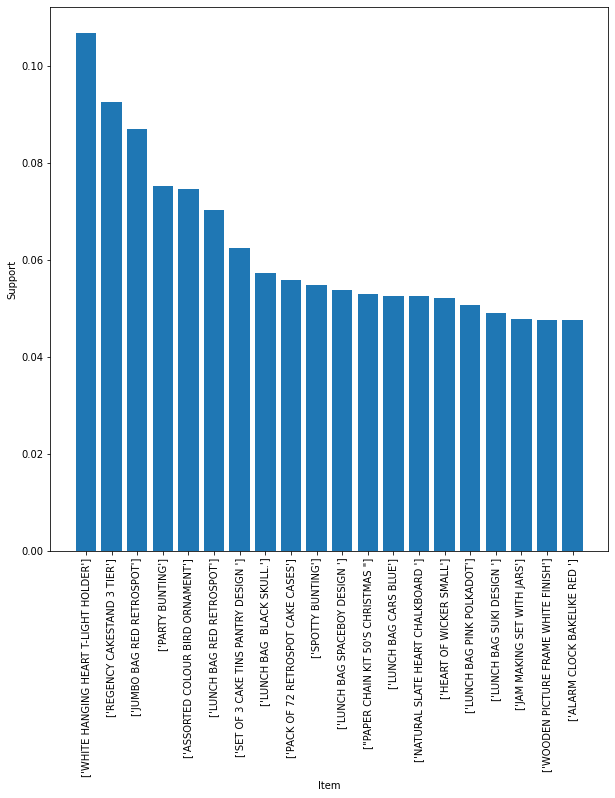

In [9]:

top_items = frequent_itemsets.sort_values('support', ascending = False)[:20]
for i in range(len(top_items.itemsets)):
    top_items.itemsets.iloc[i] = str(list(top_items.itemsets.iloc[i]))
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.bar(top_items.itemsets, top_items.support)
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)
plt.xlabel('Item')
plt.ylabel('Support')
# plt.savefig('./images/figure1.png')
plt.show()

In [4]:
rules = association_rules(
    frequent_itemsets, metric='confidence', min_threshold=0.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.047562,0.042817,0.028744,0.604358,14.115027,0.026708,2.419316
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.042817,0.047562,0.028744,0.671338,14.115027,0.026708,2.897922
2,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE PINK),0.047562,0.033272,0.021436,0.450688,13.545763,0.019853,1.759890
3,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED ),0.033272,0.047562,0.021436,0.644262,13.545763,0.019853,2.677361
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.033272,0.042817,0.018545,0.557377,13.017772,0.017120,2.162525
...,...,...,...,...,...,...,...,...,...
182,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.034635,0.041235,0.025254,0.729134,17.682461,0.023825,3.539627
183,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.041235,0.034635,0.025254,0.612434,17.682461,0.023825,2.490839
184,(SMALL WHITE HEART OF WICKER),(LARGE WHITE HEART OF WICKER),0.031744,0.027872,0.015327,0.482818,17.322863,0.014442,1.879663
185,(LARGE WHITE HEART OF WICKER),(SMALL WHITE HEART OF WICKER),0.027872,0.031744,0.015327,0.549902,17.322863,0.014442,2.151212


In [5]:
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,0.047025,0.049494,0.019667,0.455879,10.436023,0.017346,1.957005
std,0.016240,0.019051,0.003867,0.144371,5.142659,0.003623,0.942341
min,0.020399,0.020399,0.015054,0.202321,1.894456,0.007185,1.119753
25%,0.035726,0.036599,0.016581,0.355762,7.075802,0.014552,1.472274
50%,0.044617,0.047235,0.018817,0.422983,8.710639,0.016441,1.655336
75%,0.052634,0.053780,0.022526,0.550784,13.017772,0.019853,2.061516
max,0.106796,0.106796,0.029726,0.894495,29.211821,0.027900,9.121030


In [11]:
top_rules = rules.sort_values('confidence', ascending=False)[:10]
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
134,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.023781,0.037690,0.021272,0.894495,23.733255,0.020376,9.121030
135,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.025090,0.042653,0.021272,0.847826,19.877293,0.020202,6.291137
112,"(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...",(ROSES REGENCY TEACUP AND SAUCER ),0.020399,0.042653,0.017018,0.834225,19.558406,0.016147,5.774964
129,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.030326,0.037690,0.025090,0.827338,21.951400,0.023947,5.573381
132,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.030326,0.042653,0.023781,0.784173,18.384938,0.022487,4.435708
108,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.037690,0.042653,0.029508,0.782923,18.355647,0.027900,4.410179
113,"(ROSES REGENCY TEACUP AND SAUCER , REGENCY CAK...",(GREEN REGENCY TEACUP AND SAUCER),0.022854,0.037690,0.017018,0.744630,19.756943,0.016156,3.768300
118,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.023563,0.025199,0.017345,0.736111,29.211821,0.016751,3.693982
121,(BAKING SET SPACEBOY DESIGN),(BAKING SET 9 PIECE RETROSPOT ),0.023126,0.046580,0.016963,0.733491,15.746857,0.015886,3.577434
183,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.034635,0.041235,0.025254,0.729134,17.682461,0.023825,3.539627


In [12]:
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,0.047025,0.049494,0.019667,0.455879,10.436023,0.017346,1.957005
std,0.016240,0.019051,0.003867,0.144371,5.142659,0.003623,0.942341
min,0.020399,0.020399,0.015054,0.202321,1.894456,0.007185,1.119753
25%,0.035726,0.036599,0.016581,0.355762,7.075802,0.014552,1.472274
50%,0.044617,0.047235,0.018817,0.422983,8.710639,0.016441,1.655336
75%,0.052634,0.053780,0.022526,0.550784,13.017772,0.019853,2.061516
max,0.106796,0.106796,0.029726,0.894495,29.211821,0.027900,9.121030


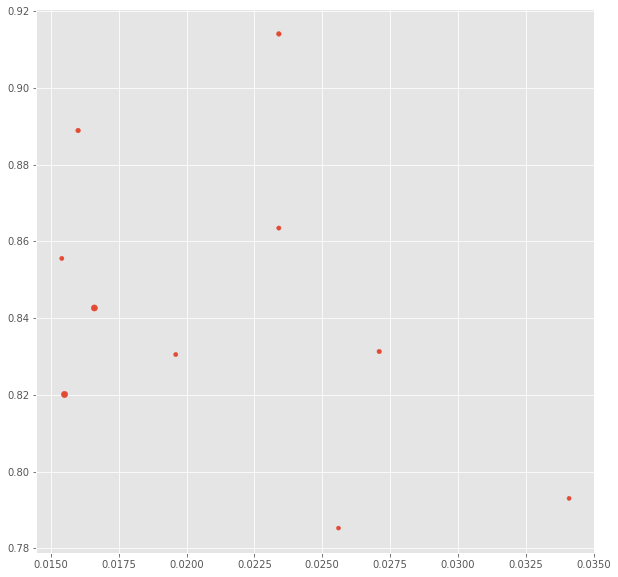

In [24]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(top_rules.support, top_rules.confidence, top_rules.lift)

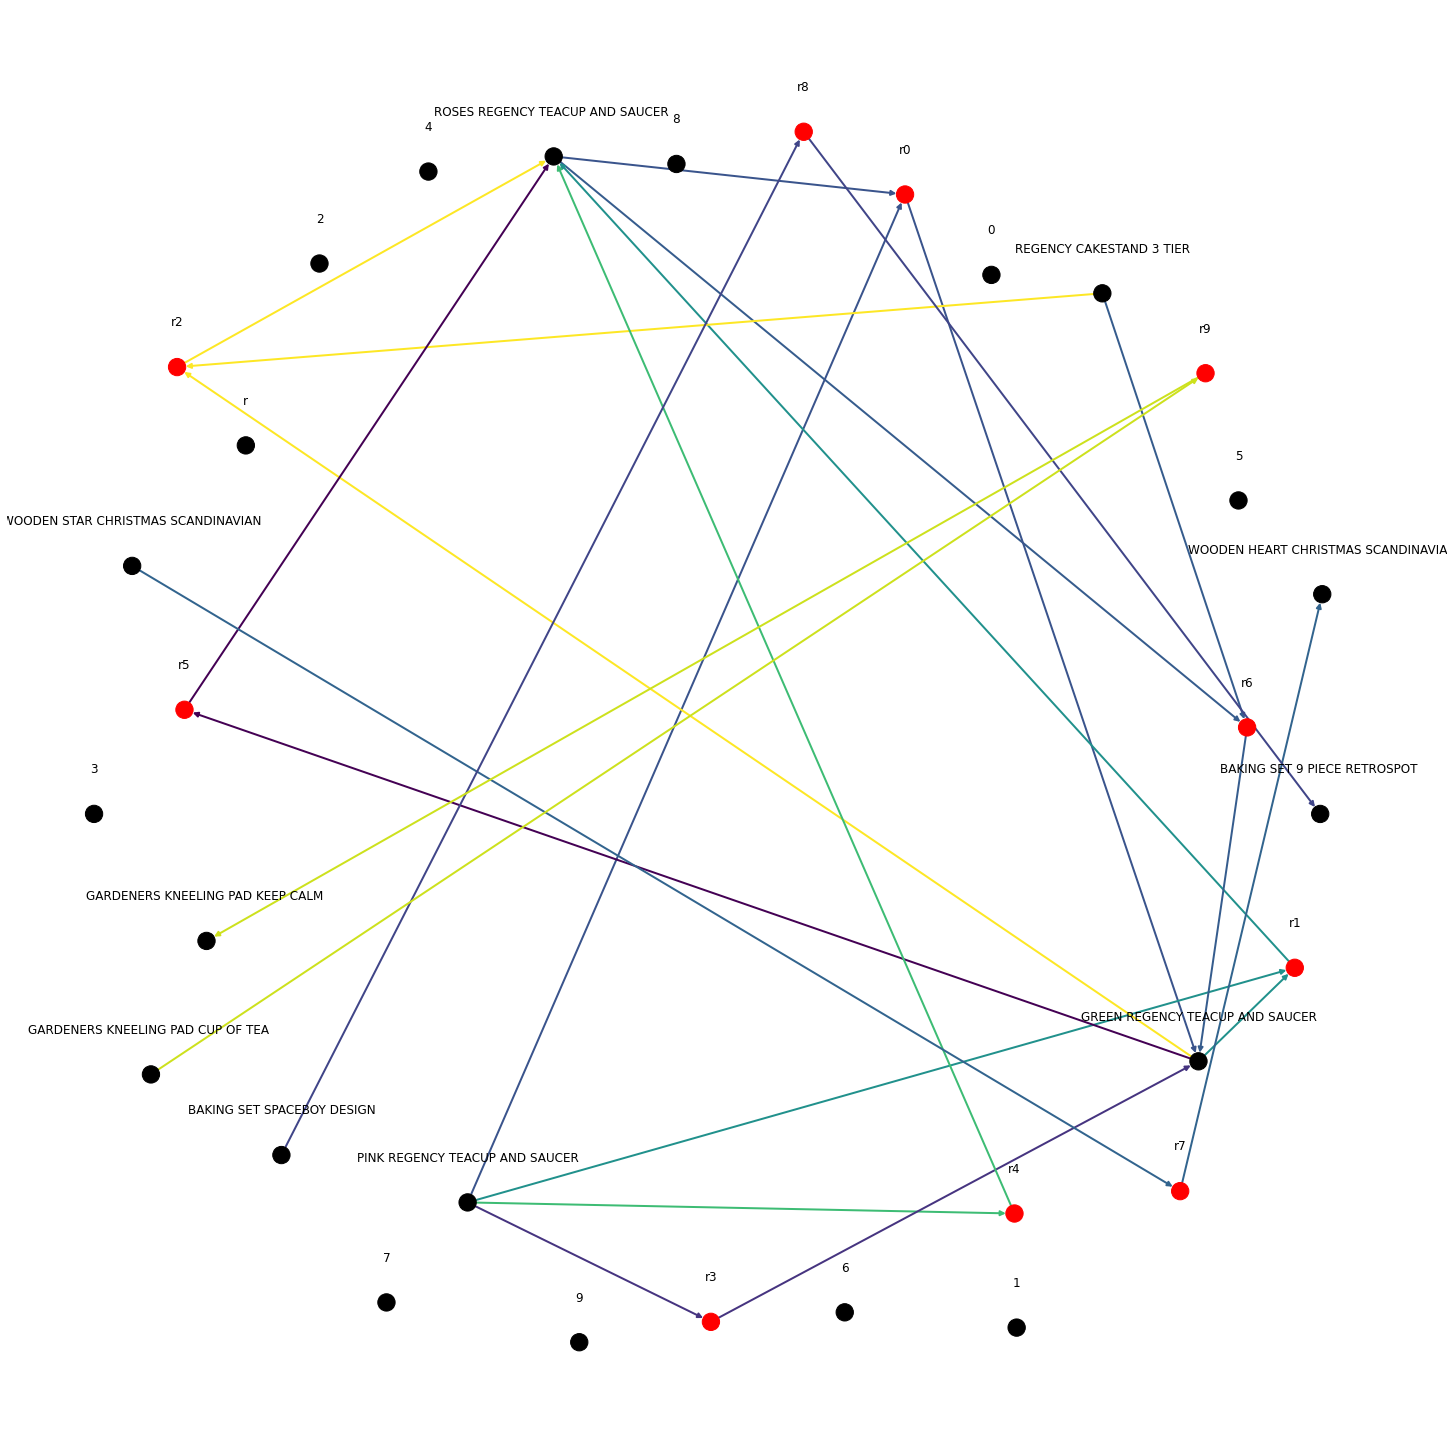

In [16]:
import networkx as nx
G1 = nx.DiGraph()
color_map = []
N = 50
colors = np.random.rand(N)
strs = ['r0', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9']
for i in range(10):
    G1.add_nodes_from('r'+str(i))
    for a in top_rules.iloc[i]['antecedents']:
        G1.add_nodes_from([a])
        G1.add_edge(a, 'r'+str(i), color = colors[i], weight = 2)
    for c in top_rules.iloc[i]['consequents']:
        G1.add_nodes_from([c])
        G1.add_edge('r'+str(i), c, color = colors[i], weight = 2)
for node in G1:
    found_a_string = False
    for item in strs:
        if node == item:
            found_a_string = True
    if found_a_string:
        color_map.append('red')
    else:
        color_map.append('black')
edges = G1.edges()
colors = [G1[u][v]['color'] for u,v in edges]
weights = [G1[u][v]['weight'] for u,v in edges]
pos = nx.spring_layout(G1, k = 16, scale = 1)
fig = plt.figure(figsize = (20,20))
nx.draw(G1, pos, node_color = color_map, edge_color = colors, width = weights, font_size = 16, with_labels = False)
for p in pos:
    pos[p][1] += 0.07

nx.draw_networkx_labels(G1, pos)
plt.savefig('./images/web1.png')
plt.show()